In [185]:
# !pip install pandas_datareader

In [1]:
import math
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas_datareader as pdr
from datetime import datetime, timedelta

In [2]:
#Get the stock
ticker = 'PTON'
stock ="Peloton Interactive Inc"
# Time step n days, here we will use n  days historical data to predict next day closing
ts_points = 120
# train_data[0:60,0]  

today = datetime.today()
# start_date ='2016-01-01'
start_date = (today - timedelta(days=5*365) ).strftime('%Y-%m-%d')

end_date   = today.strftime('%Y-%m-%d')
stock_df = pdr.DataReader(ticker, data_source="yahoo", start=start_date, end=end_date)

In [3]:
# Date is an index but to be sure , let's sort
stock_df = stock_df.sort_index(ascending=True)
stock_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-26,27.980000,24.750000,27.170000,25.760000,47067700,25.760000
2019-09-27,26.170000,23.750000,26.170000,25.240000,15976000,25.240000
2019-09-30,25.850000,25.000000,25.260000,25.100000,4482900,25.100000
2019-10-01,25.170000,22.510000,25.000000,22.510000,8816100,22.510000
2019-10-02,23.180000,21.760000,22.250000,22.600000,9454700,22.600000
...,...,...,...,...,...,...
2021-10-18,88.900002,83.580002,85.110001,87.650002,6496000,87.650002
2021-10-19,88.300003,85.870003,87.550003,88.190002,4020600,88.190002
2021-10-20,93.750000,89.779999,91.410004,90.650002,9689600,90.650002


In [4]:
# check for nulls
stock_df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [5]:
# Get shape
stock_df.shape

(524, 6)

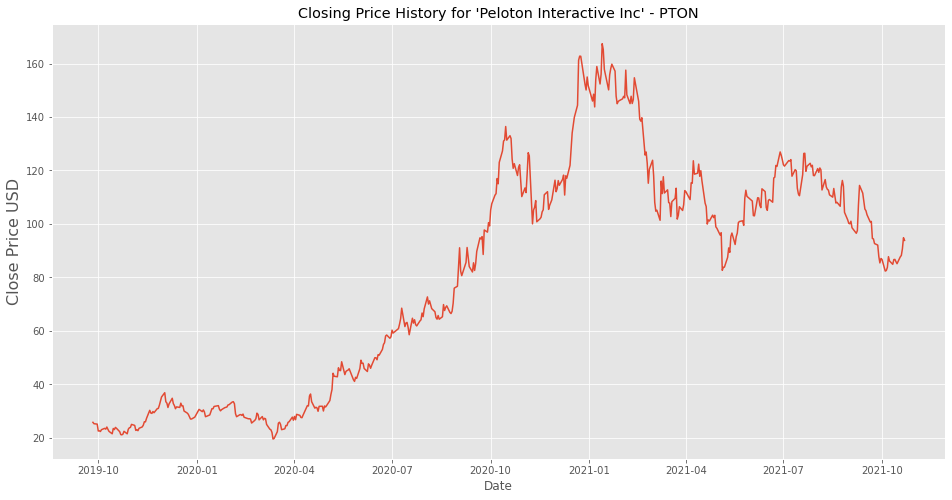

In [6]:
# Visualize closing price history
plt.figure(figsize=(16,8))
plt.title (f"Closing Price History for '{stock}' - {ticker}")
plt.plot(stock_df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price USD', fontsize=16)
plt.savefig('Saved_Models/Images/his_'+ticker+'.png')
plt.show()

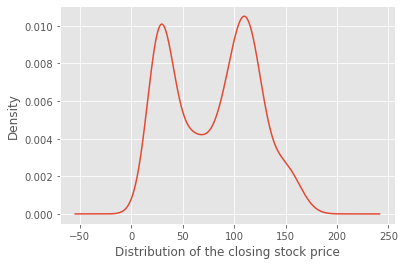

In [7]:
stock_df['Close'].plot.density()
plt.xlabel('Distribution of the closing stock price')
plt.savefig('Saved_Models/Images/den_'+ticker+'.png')
plt.show()

In [8]:
# DF with only close
TSdata_df = stock_df.filter(['Close'])
TSdata_arr = TSdata_df.values # this creates an array of Close Price
TSdata_arr

array([[ 25.76000023],
       [ 25.23999977],
       [ 25.10000038],
       [ 22.51000023],
       [ 22.60000038],
       [ 22.32999992],
       [ 23.01000023],
       [ 23.51000023],
       [ 23.20999908],
       [ 24.        ],
       [ 23.13999939],
       [ 22.38999939],
       [ 21.46999931],
       [ 23.44499969],
       [ 23.03000069],
       [ 23.86000061],
       [ 23.52000046],
       [ 22.26000023],
       [ 21.15999985],
       [ 21.07999992],
       [ 21.34000015],
       [ 22.39999962],
       [ 21.45999908],
       [ 23.18000031],
       [ 23.71999931],
       [ 23.87000084],
       [ 24.98999977],
       [ 24.61000061],
       [ 22.73999977],
       [ 23.02000046],
       [ 22.62999916],
       [ 23.52000046],
       [ 24.04000092],
       [ 24.69000053],
       [ 25.97999954],
       [ 25.93000031],
       [ 27.22999954],
       [ 30.25      ],
       [ 29.23999977],
       [ 29.10000038],
       [ 29.79999924],
       [ 29.36000061],
       [ 30.87000084],
       [ 30

In [9]:
# Scale the Data
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(TSdata_arr)
#scaled_data

array([[0.04225543],
       [0.03873977],
       [0.03779325],
       [0.0202826 ],
       [0.02089108],
       [0.01906565],
       [0.02366304],
       [0.02704347],
       [0.0250152 ],
       [0.0303563 ],
       [0.02454195],
       [0.01947129],
       [0.0132513 ],
       [0.02660401],
       [0.02379826],
       [0.02940978],
       [0.02711108],
       [0.01859239],
       [0.01115543],
       [0.01061456],
       [0.01237239],
       [0.0195389 ],
       [0.01318369],
       [0.02481239],
       [0.02846325],
       [0.02947739],
       [0.03704955],
       [0.03448043],
       [0.0218376 ],
       [0.02373065],
       [0.0210939 ],
       [0.02711108],
       [0.03062674],
       [0.0350213 ],
       [0.04374281],
       [0.04340477],
       [0.0521939 ],
       [0.07261172],
       [0.06578324],
       [0.06483673],
       [0.06956933],
       [0.06659455],
       [0.07680347],
       [0.07741193],
       [0.08552498],
       [0.10628084],
       [0.11716585],
       [0.094

In [10]:
training_data_len = math.ceil(len(TSdata_arr) * 0.75)
training_data_len

393

In [11]:
# Created scaled training dataset
train_data = scaled_data[0:training_data_len]
train_data.shape

(393, 1)

In [12]:
# Split
X_train = []
y_train = []

for i in range(ts_points, len(train_data)):
    X_train.append(train_data[i-ts_points:i,0])
    y_train.append(train_data[i,0])
    # if i <= ts_points+3:
    #     print(X_train)
    #     print(y_train)
    #     print()


[array([0.04225543, 0.03873977, 0.03779325, 0.0202826 , 0.02089108,
       0.01906565, 0.02366304, 0.02704347, 0.0250152 , 0.0303563 ,
       0.02454195, 0.01947129, 0.0132513 , 0.02660401, 0.02379826,
       0.02940978, 0.02711108, 0.01859239, 0.01115543, 0.01061456,
       0.01237239, 0.0195389 , 0.01318369, 0.02481239, 0.02846325,
       0.02947739, 0.03704955, 0.03448043, 0.0218376 , 0.02373065,
       0.0210939 , 0.02711108, 0.03062674, 0.0350213 , 0.04374281,
       0.04340477, 0.0521939 , 0.07261172, 0.06578324, 0.06483673,
       0.06956933, 0.06659455, 0.07680347, 0.07741193, 0.08552498,
       0.10628084, 0.11716585, 0.09444932, 0.09093367, 0.07977824,
       0.0887026 , 0.10317085, 0.08971671, 0.08464606, 0.07666825,
       0.08126564, 0.07998107, 0.09073085, 0.08369954, 0.08396998,
       0.0708539 , 0.06564802, 0.06247042, 0.0506389 , 0.0506389 ,
       0.0553039 , 0.06010411, 0.06916368, 0.07497803, 0.06923129,
       0.07362585, 0.0685552 , 0.05652086, 0.05746738, 0.0609

In [13]:
# convert X_train and y_train to numpy arrays for LSTM
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
print (X_train.shape)
print (y_train.shape)

(273, 120)
(273,)


In [15]:
# LSTM network expects a 3D input (No_of_Samples, number of time steps, and number of features) no_of_features = 1 (Close)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(273, 120, 1)

In [16]:
training_data_len - ts_points

273

In [17]:
# hidden_nodes = int(2/3 * (X_train.shape[1] * 1))
# print(f"The number of hidden nodes is {hidden_nodes}.")

The number of hidden nodes is 80.


In [18]:
# LSTM MOdel
model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
# model.add(tf.keras.layers.LSTM(50, return_sequences=False))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(25))
# model.add(tf.keras.layers.Dense(1))
# model.summary()


In [19]:

# BEST FOR PTON#
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
# model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))
model.summary()

# model.fit(X_train, y_train, batch_size=64, epochs=50

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')
#model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size=64

os.makedirs("chk_points/", exist_ok=True)
chkpoint_path="chk_points/weights.{epoch}.hdf5"

# Create chk points
chkpt_callback = ModelCheckpoint(filepath=chkpoint_path,
                              verbose=1,
                              save_weights_only=True,
                              save_freq="epoch",
                              period=5)

# chkpoint_path = "chk_points/cp-{epoch:04d}.ckpt"
# chkpt_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=chkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     save_freq=5*batch_size)                    

# model.save_weights(chkpoint_path.format(epoch=0))    


In [22]:
# training_data_len
# scaled_data

array([[0.04225543],
       [0.03873977],
       [0.03779325],
       [0.0202826 ],
       [0.02089108],
       [0.01906565],
       [0.02366304],
       [0.02704347],
       [0.0250152 ],
       [0.0303563 ],
       [0.02454195],
       [0.01947129],
       [0.0132513 ],
       [0.02660401],
       [0.02379826],
       [0.02940978],
       [0.02711108],
       [0.01859239],
       [0.01115543],
       [0.01061456],
       [0.01237239],
       [0.0195389 ],
       [0.01318369],
       [0.02481239],
       [0.02846325],
       [0.02947739],
       [0.03704955],
       [0.03448043],
       [0.0218376 ],
       [0.02373065],
       [0.0210939 ],
       [0.02711108],
       [0.03062674],
       [0.0350213 ],
       [0.04374281],
       [0.04340477],
       [0.0521939 ],
       [0.07261172],
       [0.06578324],
       [0.06483673],
       [0.06956933],
       [0.06659455],
       [0.07680347],
       [0.07741193],
       [0.08552498],
       [0.10628084],
       [0.11716585],
       [0.094

In [23]:
# model.fit(X_train, y_train, batch_size=batch_size, epochs=50, validation_split=0.43, callbacks=[chkpt_callback])
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
5/5 [==============================] - 3s 97ms/step - loss: 0.9351 - accuracy: 0.0000e+00
Epoch 2/50
5/5 [==============================] - 1s 105ms/step - loss: 0.5855 - accuracy: 0.0037
Epoch 3/50
5/5 [==============================] - 1s 103ms/step - loss: 0.5492 - accuracy: 0.0037
Epoch 4/50
5/5 [==============================] - 0s 95ms/step - loss: 0.5628 - accuracy: 0.0037
Epoch 5/50
5/5 [==============================] - 1s 102ms/step - loss: 0.5586 - accuracy: 0.0037
Epoch 6/50
5/5 [==============================] - 1s 103ms/step - loss: 0.5487 - accuracy: 0.0037
Epoch 7/50
5/5 [==============================] - 1s 103ms/step - loss: 0.5455 - accuracy: 0.0037
Epoch 8/50
5/5 [==============================] - 0s 96ms/step - loss: 0.5465 - accuracy: 0.0037
Epoch 9/50
5/5 [==============================] - 1s 100ms/step - loss: 0.5427 - accuracy: 0.0037
Epoch 10/50
5/5 [==============================] - 1s 102ms/step - loss: 0.5416 - accuracy: 0.0037
Epoch 11/50
5/5 [=

In [24]:
model.save('Saved_Models/Model_'+ticker+'.h5')

In [25]:
#test_data = scaled_data[training_data_len:]

# Bring in the last 'ts_points' (60 values) from training set so when X_test is used to predict , predictions have same shape as Y_test
# The for loop starts with 'ts_points' thatbmeans the resultant array will have 60 less rows
test_data = scaled_data[training_data_len-ts_points:]
#test_data[0:60,0]


array([0.66655398, 0.68717465, 0.6937327 , 0.65174772, 0.61321074,
       0.63504836, 0.62328442, 0.66993442, 0.72422418, 0.71631398,
       0.5442499 , 0.5794064 , 0.58616726, 0.60313706, 0.54952337,
       0.55702794, 0.56101683, 0.57453856, 0.57974446, 0.61787575,
       0.62565076, 0.58082617, 0.59110272, 0.6048949 , 0.65472246,
       0.62551552, 0.63329052, 0.65370832, 0.6418768 , 0.6566155 ,
       0.66756812, 0.61713205, 0.66581028, 0.65979311, 0.69231293,
       0.73199919, 0.7740518 , 0.79298225, 0.81353524, 0.84429721,
       0.95801507, 0.96849433, 0.96822394, 0.89696433, 0.88290182,
       0.91575964, 0.89385439, 0.85491183, 0.8722872 , 0.84003783,
       0.90926916, 0.94226223, 0.8980461 , 0.92306129, 1.        ,
       0.98532893, 0.93502805, 0.88317221, 0.92137107, 0.93719158])

In [26]:
X_test = []
y_test = TSdata_arr[training_data_len:]
for i in range(ts_points, len(test_data)):
    X_test.append(test_data[i-ts_points:i,0])


In [27]:
# convert the data to a numpy array to use it in LSTM MODEL
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],  X_test.shape[1], 1))

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
# Models predicted price for X_train
predictions_tr = model.predict(X_train)
predictions_tr = scaler.inverse_transform(predictions_tr)

y_train_tr =  scaler.inverse_transform(y_train.reshape(-1,1))
rmse_tr = math.sqrt(mean_squared_error(y_train_tr, predictions_tr))
rmse_tr

7.3247441912435

In [30]:
# Models predicted price for X_test
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

In [31]:
y_test.shape, predictions.shape

((131, 1), (131, 1))

In [32]:
# RMSE to check accuracy

rmse = math.sqrt(mean_squared_error(y_test, predictions))
rmse

7.864785993400944

In [33]:
# Plot
train = TSdata_df[:training_data_len]
actual = TSdata_df[training_data_len:]
actual['Predictions'] = predictions
actual

<ipython-input-33-bb86776ae978>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['Predictions'] = predictions


,Close,Predictions
Date,,
2021-04-20,106.500000,119.867805
2021-04-21,99.930000,119.178856
2021-04-22,101.489998,117.754829
2021-04-23,101.070000,116.031471
2021-04-26,103.269997,114.158035
...,...,...
2021-10-18,87.650002,88.679596
2021-10-19,88.190002,88.815865
2021-10-20,90.650002,89.091911


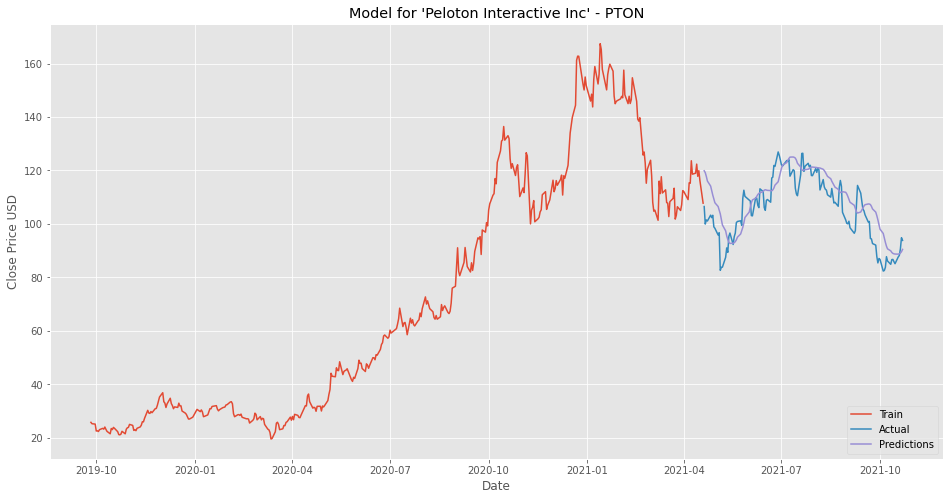

In [34]:
plt.figure(figsize=(16,8))
plt.title(f"Model for '{stock}' - {ticker}")
plt.xlabel("Date")
plt.ylabel("Close Price USD")
plt.plot(train['Close'])
plt.plot(actual[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.savefig('Saved_Models/Images/'+ticker+'.png')
plt.show()

# TEST

In [35]:
# for predictions add 100 extra days to make sure it has more than ts_points to make up for missing days (weekends and holidays)

fetch_days = ts_points + 100    

sd =  today - timedelta(days=fetch_days)
sd = sd.strftime('%Y-%m-%d')

ed = today.strftime('%Y-%m-%d')
ed

next_day = (today + timedelta(days=1) ).strftime('%Y-%m-%d')
# next_day

In [36]:
# get the quote
quote = pdr.DataReader(ticker, data_source="yahoo", start=sd, end=ed)
new_df = quote.filter(['Close'])
last_n_days = ts_points
last_n_days_arr = new_df[-last_n_days:].values 

In [37]:
last_n_days_scaled = scaler.transform(last_n_days_arr)
X_test = []
X_test.append(last_n_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


In [38]:
##########################loading saved model ###############################
new_model = tf.keras.models.load_model('Saved_Models/Model_'+ticker+'.h5')

# Check its architecture
new_model.summary()
nmpred_price = new_model.predict(X_test)
nmpred_price = scaler.inverse_transform(nmpred_price)
nmpred_price = nmpred_price[0][0]
print(f"Predicted Closing price for '{stock}' on {next_day} is {nmpred_price:.4f}")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 120, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________
Predicted Closing price for 'Peloton Interactive Inc' on 2021-10-25 is 91.4442


In [39]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price = pred_price[0][0]
print(f"Predicted Closing price for '{stock}' on {next_day} is {pred_price:.4f}")

Predicted Closing price for 'Peloton Interactive Inc' on 2021-10-25 is 91.4442


In [40]:
# verify
d1 = today - timedelta(days=5)
d1 = d1.strftime('%Y-%m-%d')

quote2 = pdr.DataReader(ticker, data_source="yahoo", start=d1)
quote2

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-19,88.300003,85.870003,87.550003,88.190002,4020600,88.190002
2021-10-20,93.750000,89.779999,91.410004,90.650002,9689600,90.650002
2021-10-21,95.589996,90.349998,90.410004,94.830002,7021600,94.830002
2021-10-22,94.904999,92.180000,93.954002,93.830002,3920300,93.830002
